In [ ]:
import tensorflow as tf

import numpy as np
import os
import time
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 

In [ ]:
path_to_file = tf.keras.utils.get_file('Ed_sheeran_songs', 'https://raw.githubusercontent.com/AmelNozieres/NLP_Generate_poems/master/Ed_sheeran_songs')

73728/70408 [===============================] - 0s 0us/step


In [ ]:
tokenizer = Tokenizer()
data = open(path_to_file, 'rb').read().decode(encoding='utf-8')
corpus = data.lower().split("\n")

#corpus[2090:2101]
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#tokenizer.word_index
print(tokenizer.word_index)
print(total_words)


{'the': 1, 'i': 2, 'and': 3, 'you': 4, 'my': 5, 'oh': 6, 'me': 7, 'in': 8, 'to': 9, 'a': 10, 'on': 11, 'it': 12, 'love': 13, 'your': 14, 'of': 15, 'we': 16, 'that': 17, 'know': 18, 'all': 19, 'but': 20, 'with': 21, "i'm": 22, 'be': 23, "don't": 24, 'just': 25, 'now': 26, 'for': 27, 'so': 28, 'come': 29, 'when': 30, 'if': 31, "i'll": 32, 'are': 33, 'can': 34, 'this': 35, 'baby': 36, 'out': 37, "you're": 38, 'is': 39, 'go': 40, "it's": 41, 'never': 42, 'up': 43, 'like': 44, 'she': 45, 'was': 46, 'long': 47, 'home': 48, 'back': 49, 'no': 50, 'take': 51, 'from': 52, 'how': 53, 'will': 54, 'one': 55, 'could': 56, 'wanna': 57, 'her': 58, 'see': 59, 'not': 60, 'way': 61, "'cause": 62, 'feel': 63, 'eyes': 64, 'then': 65, 'heart': 66, 'down': 67, 'let': 68, 'lay': 69, 'make': 70, 'he': 71, 'say': 72, 'do': 73, 'about': 74, 'as': 75, 'here': 76, 'need': 77, 'only': 78, "i've": 79, 'night': 80, 'have': 81, 'over': 82, 'got': 83, 'get': 84, 'at': 85, 'been': 86, 'new': 87, 'what': 88, 'time': 89, 

In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(predictors, label, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
390/390 [==============================] - 27s 70ms/step - loss: 5.6194 - accuracy: 0.1082
Epoch 2/100
390/390 [==============================] - 27s 69ms/step - loss: 4.1182 - accuracy: 0.2624
Epoch 3/100
390/390 [==============================] - 27s 69ms/step - loss: 3.1372 - accuracy: 0.3770
Epoch 4/100
390/390 [==============================] - 28s 71ms/step - loss: 2.4668 - accuracy: 0.4626
Epoch 5/100
390/390 [==============================] - 28s 72ms/step - loss: 1.9662 - accuracy: 0.5399
Epoch 6/100
390/390 [==============================] - 28s 72ms/step - loss: 1.6285 - accuracy: 0.6033
Epoch 7/100
390/390 [==============================] - 28s 72ms/step - loss: 1.4135 - accuracy: 0.6452
Epoch 8/100
390/390 [==============================] - 27s 70ms/step - loss: 1.2726 - accuracy: 0.6825
Epoch 9/100
390/390 [==============================] - 27s 70ms/step - loss: 1.1171 - accuracy: 0.7150
Epoch 10/100
390/390 [==============================] - 27s 70ms/step - l

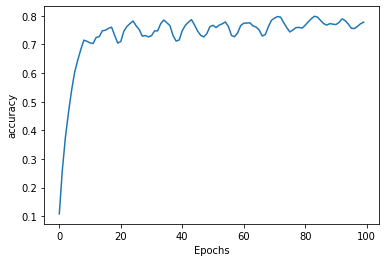

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "What love is"
next_words = 60
  
for i in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  #print(predicted)
  for word,index in tokenizer.word_index.items():
    #print(word)
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

What love is a blaze time that it takes to give out all when you stand upon my bed are changed of crisps but i guess that plays never leave me a stage a song that i wrote that mixing fitting at my erasing and a song my heart is a getting ahead of a couple of days a new you take a
